In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


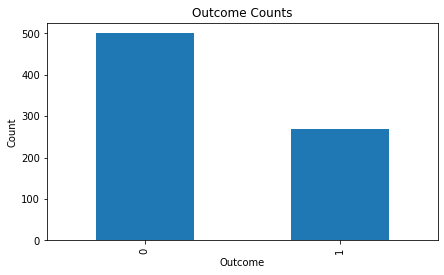

In [7]:
data['Outcome'].value_counts().plot(kind='bar',figsize=(7,4))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Counts')
plt.show()

In [8]:
data.shape


(768, 9)

In [9]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


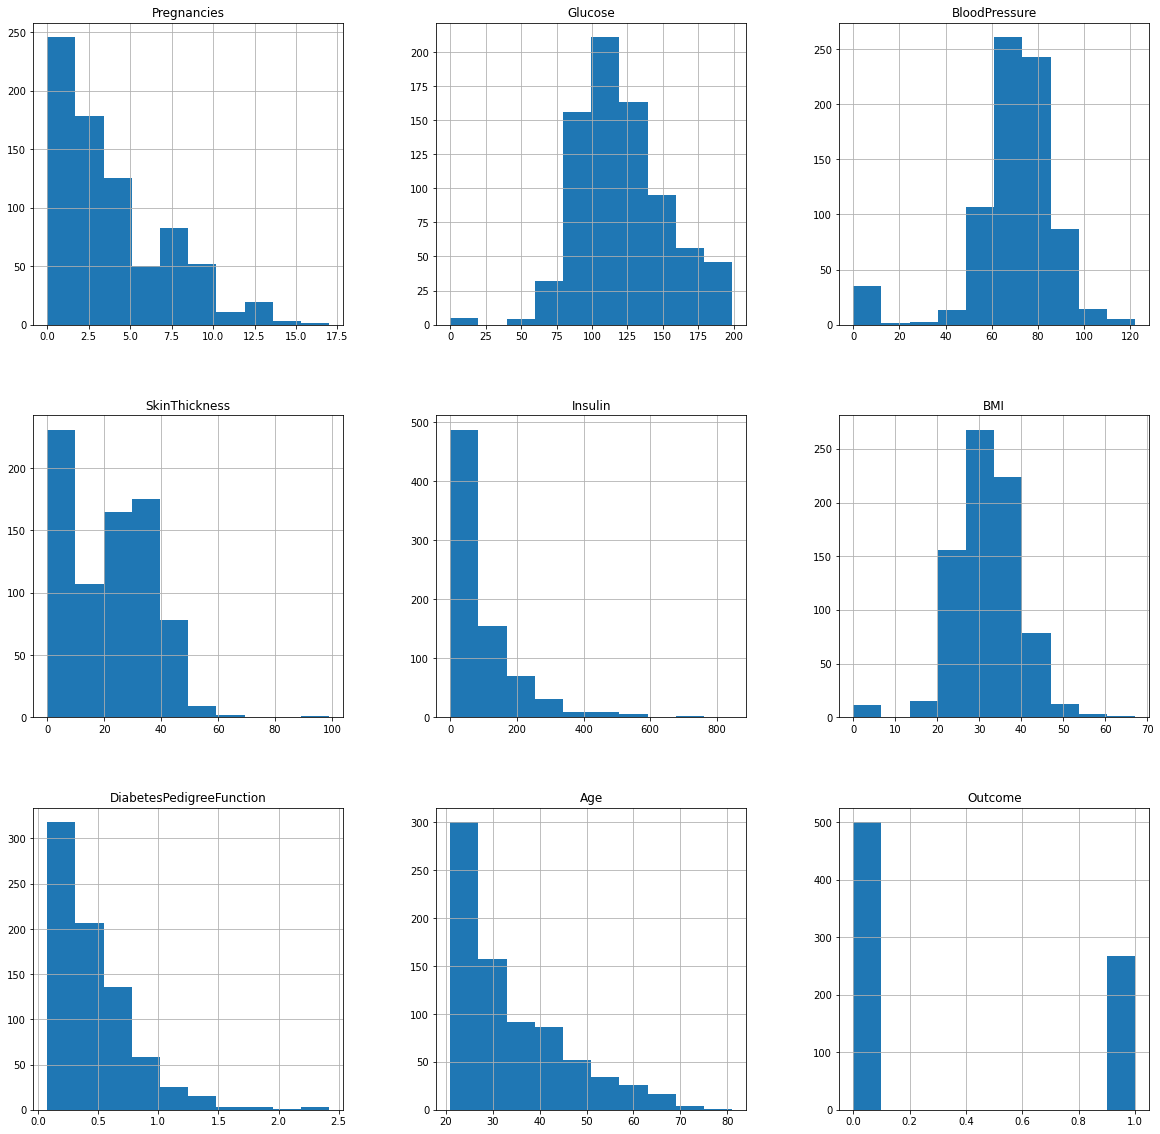

In [10]:
data.hist(figsize=(20,20))
plt.show()

In [11]:
columns_to_replace_Zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace_Zero:
    mean_value = data[data[column] != 0][column].mean()  
    data[column] = data[column].replace(0, mean_value)

In [12]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,121.69,30.44,44.00,99.75,117.00,140.25,199.00
BloodPressure,768.0,72.41,12.10,24.00,64.00,72.20,80.00,122.00
SkinThickness,768.0,29.15,8.79,7.00,25.00,29.15,32.00,99.00
Insulin,768.0,155.55,85.02,14.00,121.50,155.55,155.55,846.00
BMI,768.0,32.46,6.88,18.20,27.50,32.40,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


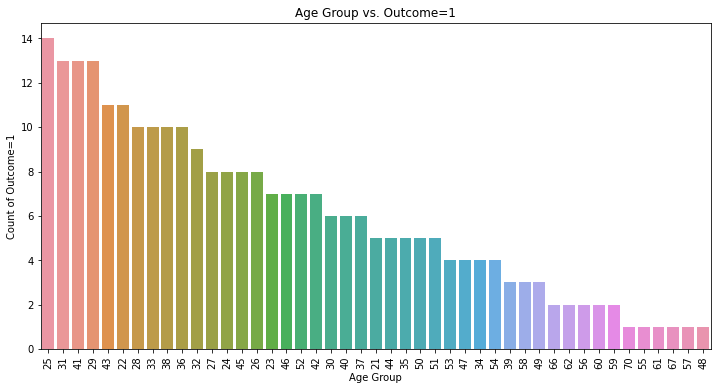

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=data[data['Outcome'] == 1], order=data[data['Outcome'] == 1]['Age'].value_counts().index)
plt.title('Age Group vs. Outcome=1')
plt.xlabel('Age Group')
plt.ylabel('Count of Outcome=1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
correlation_matrix = data.corr().round(2)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.07,0.28,-0.00,0.32,0.17
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.22
Insulin,0.06,0.42,0.07,0.16,1.00,0.17,0.10,0.14,0.21
BMI,0.02,0.23,0.28,0.54,0.17,1.00,0.15,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.10,0.10,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.13,0.14,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.22,0.21,0.31,0.17,0.24,1.00


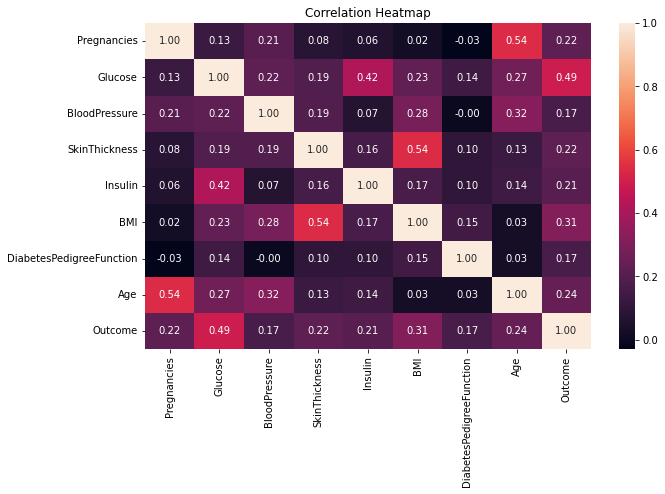

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
from sklearn.utils import resample
majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [21]:
augmented_data = pd.concat([majority_class, minority_upsampled])
data=augmented_data

In [22]:
data.shape


(1000, 9)

In [23]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = data['Outcome'].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=110, random_state=42,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
## Predict data using test data set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [28]:
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Train Accuracy: {train_accuracy:.2f}")

Test Accuracy: 0.90
Train Accuracy: 1.00


In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89 15]
 [ 5 91]]


In [30]:
pre_score = precision_score(y_test, y_pred)
print(f"Precission Data Score: {pre_score:.2f}")

Precission Data Score: 0.86


In [31]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       104
           1       0.86      0.95      0.90        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [32]:
import joblib
model_filename = 'model.pkl'
joblib.dump(model, model_filename)

['model.pkl']